In [58]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

In [59]:
def plot_beta_pdf(*params):
    x = np.linspace(0, 1, 100)
    plt.figure(figsize=(5,5), dpi=300)
    for param in params:
        plt.xlim(0, 1)
        plt.plot(x, beta.pdf(x, *param), '-', label=f"a={param[0]}, b={param[1]}")
        plt.title('Beta Distribution')
        plt.xlabel('Values of Random Variable X (0, 1)')
        plt.ylabel('Probability')
        plt.legend()
    plt.show()

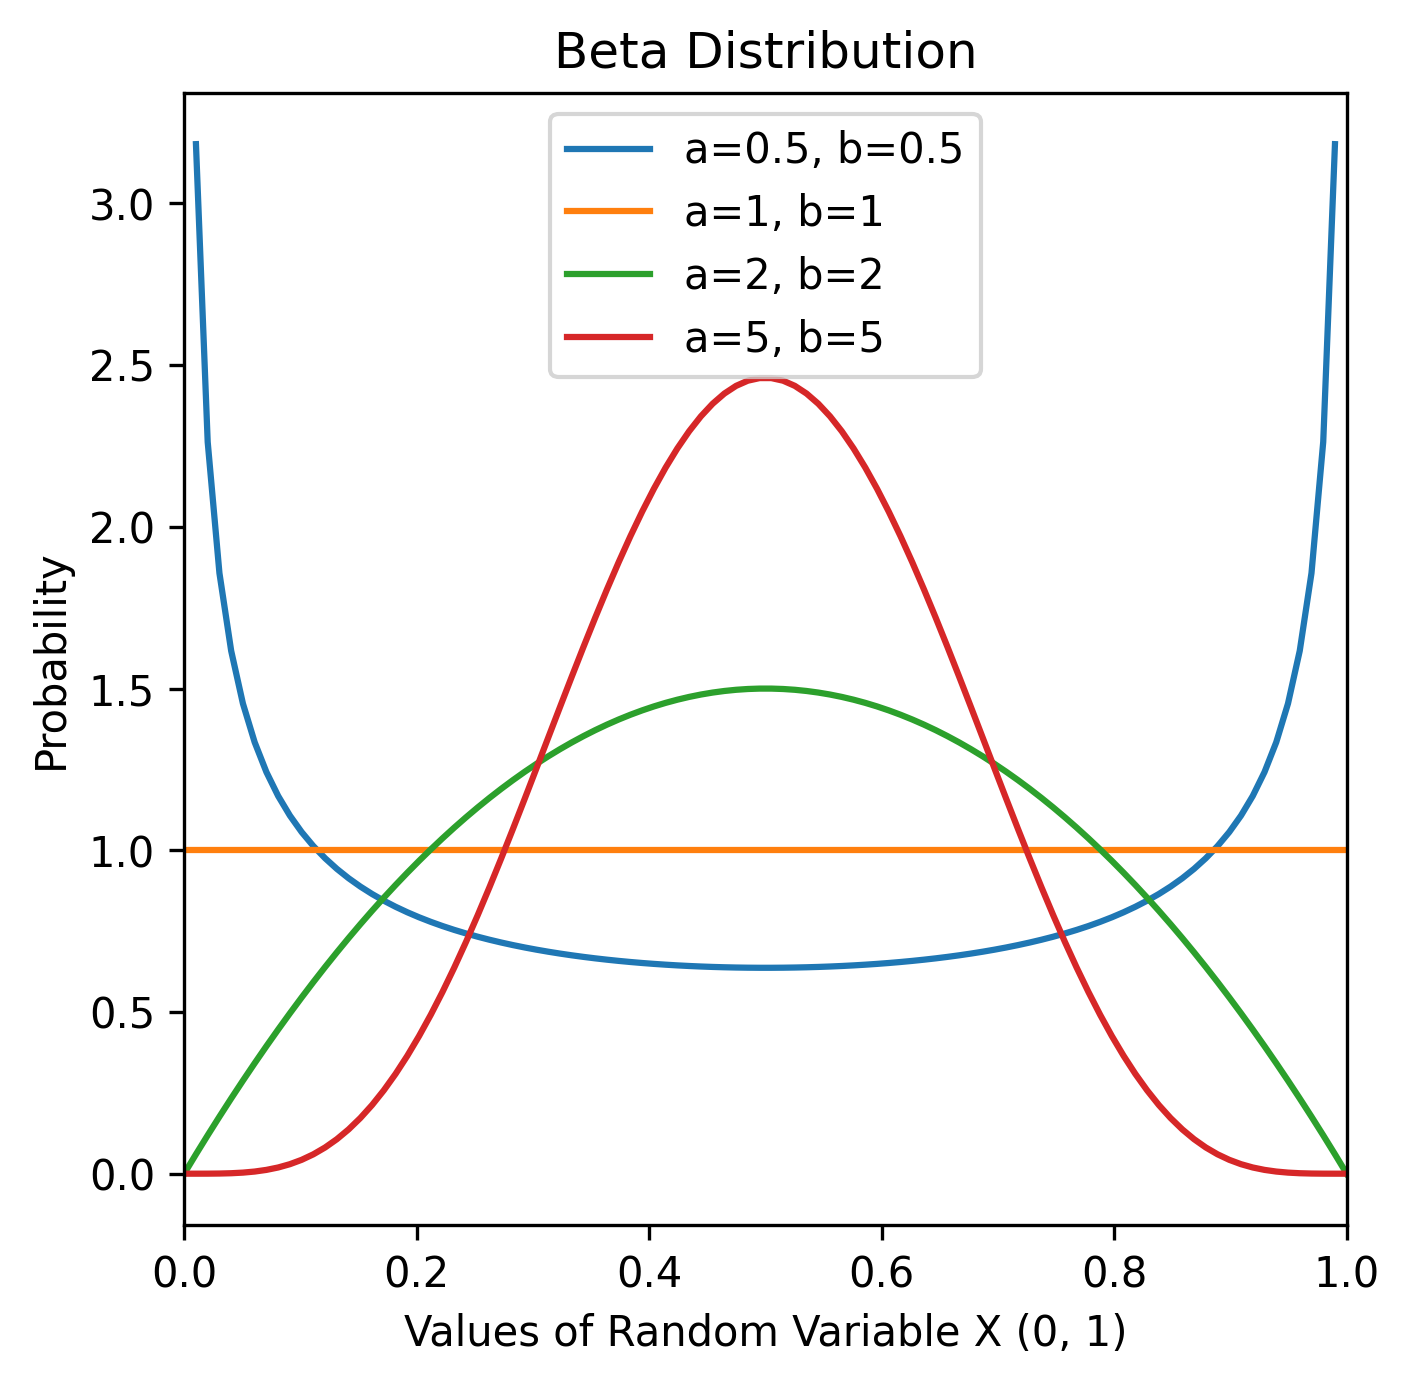

In [60]:
plot_beta_pdf((0.5, 0.5), (1, 1), (2, 2), (5, 5))

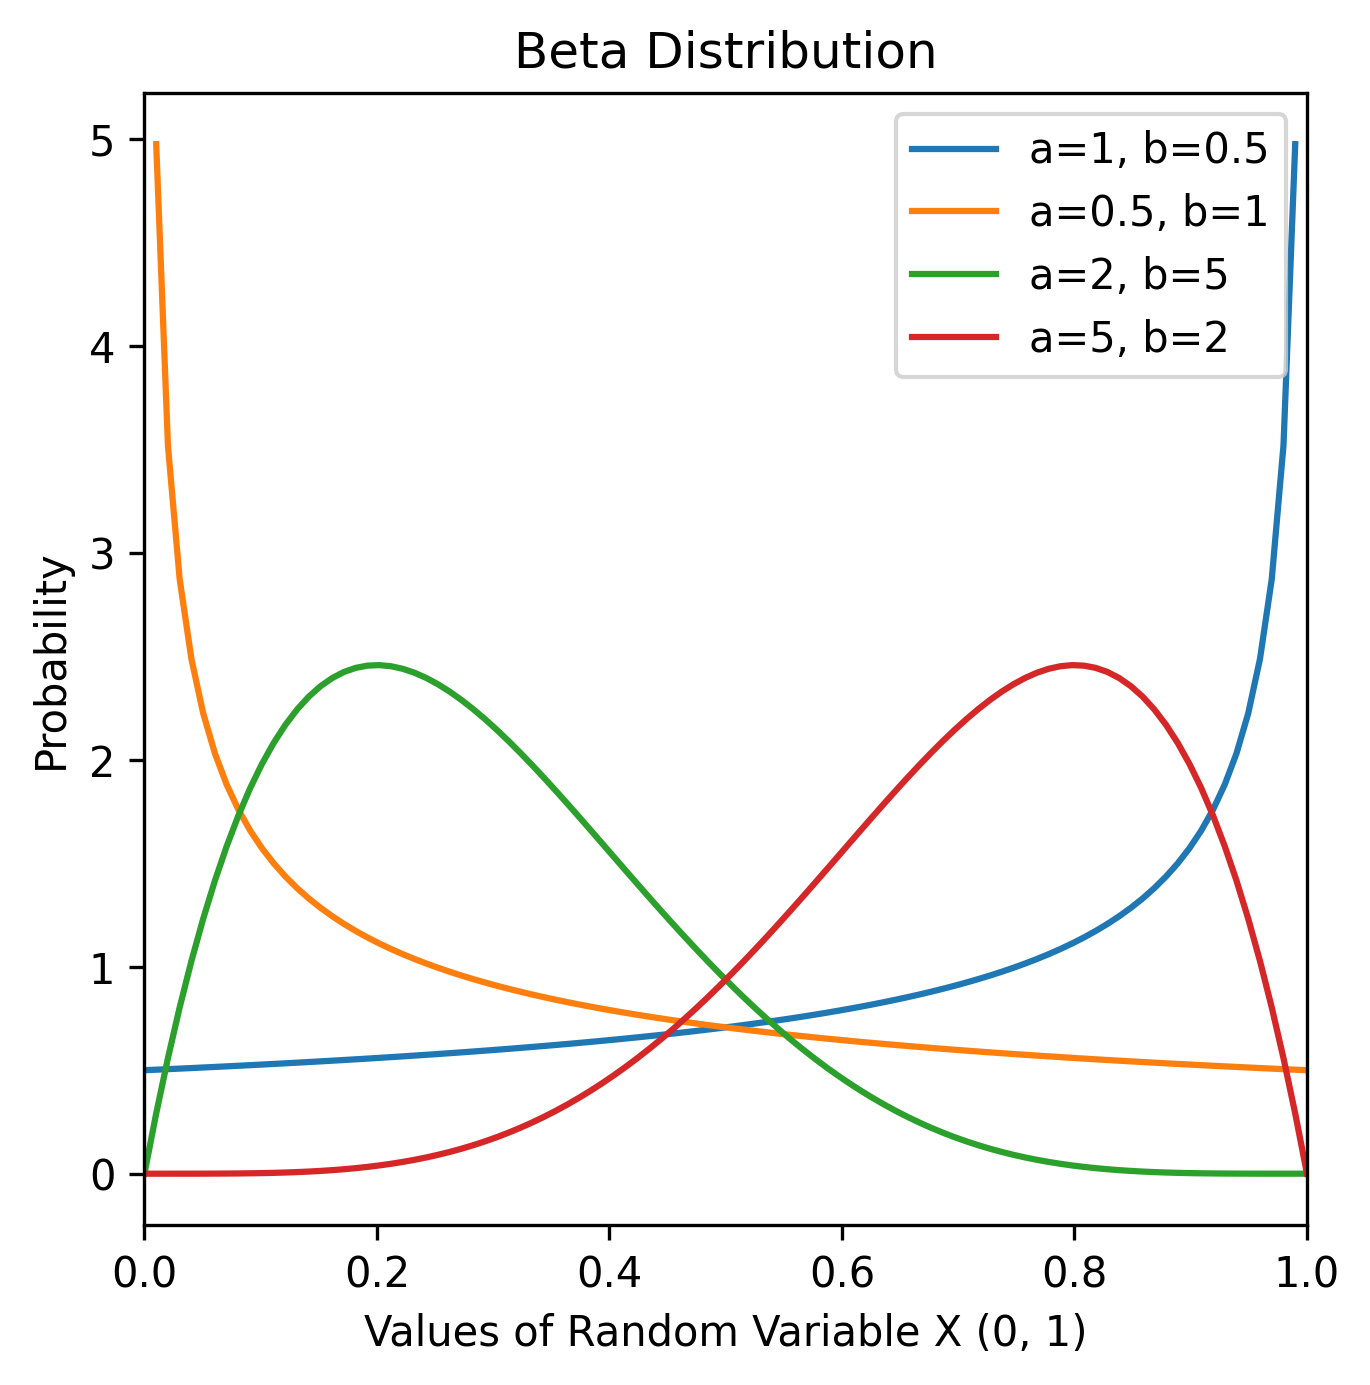

In [61]:
plot_beta_pdf((1, 0.5), (0.5, 1), (2, 5), (5, 2))


### Definition
Beta distribution:
$$f(x;\alpha, \beta) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)}, \quad x \in [0, 1], \alpha > 0, \beta > 0$$
Sometimes it is written as $x \sim Beta(\alpha, \beta)$   
Special case: $\alpha = \beta = 1$, uniform distribution  

After integral on [0, 1]:
$$B(\alpha, \beta) = \int _0 ^1 x^{\alpha-1}(1-x)^{\beta-1}dx$$

### Why use bata distribution as the prior distribution?
First we introduce the **general beta distribution** with four parameters: $a$, $b$, $\alpha$, $\beta$
$$f(x;\alpha, \beta) = \frac{(x-a)^{\alpha-1}(b-x)^{\beta-1}}{B(\alpha, \beta) (b-a)^{\alpha + \beta - 1}}, \quad, x \in [a, b]$$
The **standard/two-parameter beta distribution** is the special case when $a = 0$, $b = 1$.
The parameters $a$ and $b$ specifies the range of random variable $X$. For the standard beta distribution, the range is (0, 1), so it is considered as **probability distribution of probabilities**. This is the reason why beta distribution is usually used to model the distribution of things that represent probability. For example, in Bernoulli experiment, the probability of sucess can be modeled as a beta distribution (**prior distribution**).  

In Bayesian inference, beta distribution is the conjugate prior probability distribution for the Bernoulli, Binomial, negative nomial and geometric distribution.  
Derivation of posterior distribution of the probability parameter $\theta$ in Bernoulli experiment:  
After n IID experiments, the results are $x_i \in \{0, 1\}$,
$$p(\theta \mid x) \propto p(x \mid \theta)p(\theta) \propto \theta ^{\sum x_i} (1 -\theta) ^{n - \sum x_i} \theta ^{\alpha - 1} (1-\theta) ^{\beta - 1} = \theta ^{\alpha + \sum x_i - 1} (1 -\theta) ^{\beta + n - \sum x_i - 1}$$
So the posterior distrubution is $Beta(\alpha', \beta') = Beta(\alpha + \sum x_i, \beta + n - \sum x_i)$

### Relationship between beta function and gamma function

The following relationship can be proved mathematically be definition:
$$Beta(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}$$
where $\Gamma(\alpha) = \int _0 ^\infty x^{\alpha - 1}e^{-x} dx$
Here I have an example from this [post](https://zhuanlan.zhihu.com/p/69606875) to understand it when $\alpha$ and $\beta$ are integers.  
Considering first throwing a red ball to the table whoes length is 1. The left part of table has length $x$ while the right part has length $1-x$. Then independently throw $n$ white balls to the table, suppose there are $k$ white balls lie on the left side of the red ball. The random variable K follows a binomial distribution:
$$K \sim Binomial(n,x), \quad P(K=k \mid x) = {n \choose x} x^k(1-x)^{n-k}$$
If $X \sim U(0,1)$,  
$$P(K=k) = \int _0 ^ 1 {n \choose x} x^k(1-x)^{n-k} dx= {n \choose x} Beta(k+1,n-k+1)$$
On the other hand, we can consider first throwing n+1 balls and color one of them as red. Since the red ball is uniformly distributed, the probability of having any number of white balls on the left is equal, so
$$P(K=k) = \frac{1}{n+1} ={n \choose x} Beta(k+1,n-k+1)$$
With $\Gamma(k+1) = k!$, we could easily get
$$Beta(k+1,n-k+1) = \frac{\Gamma(k+1)\Gamma(n-k+1)}{\Gamma(n+2)}$$


Using this relationship, it is easy to calculate the exectation and variance of a beta distribution:
$$E[X] = \frac{\alpha}{\alpha + \beta}$$
$$E[X^2] = \frac{\alpha(\alpha+1)}{(\alpha + \beta)((\alpha + \beta + 1))}$$
$$Var[X] = E[X^2] - E^2[X] = \frac{\alpha \beta}{(\alpha + \beta+1)(\alpha + \beta)^2}$$
